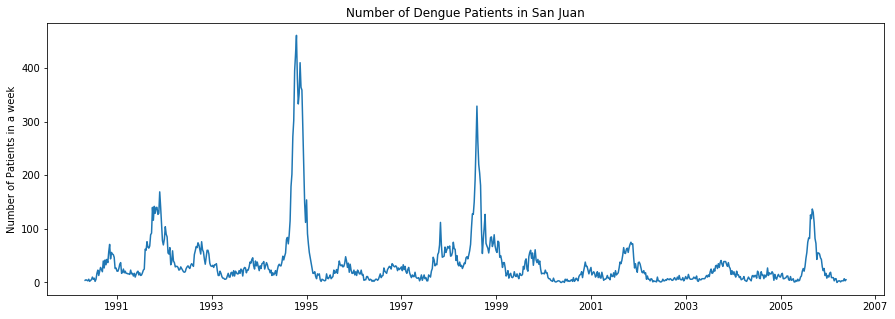

In [1]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer as im

%matplotlib inline

data = pd.read_csv("sj_train.csv", index_col=3, parse_dates=['week_start_date'])
data_predict=pd.read_csv("sj_test.csv", index_col=3, parse_dates=['week_start_date'])

#drop non-numerical values
#print(data.head())
#print(data_predict.head())

#plotting san juan
plt.figure(figsize=(15,5));
plt.plot(data.index,data['total_cases']);
plt.ylabel('Number of Patients in a week');
plt.title('Number of Dengue Patients in San Juan');
plt.plot();





In [2]:
model = pf.ARIMAX(data=data, formula='total_cases~1+ndvi_ne+ndvi_nw+ndvi_se+ndvi_sw+reanalysis_air_temp_k\
        +reanalysis_relative_humidity_percent+reanalysis_specific_humidity_g_per_kg+reanalysis_tdtr_k\
        +station_avg_temp_c+station_diur_temp_rng_c+station_max_temp_c+station_min_temp_c+station_precip_mm ',
                  ar=2, ma=1,integ=0, family=pf.Normal())
x = model.fit("MLE")
x.summary()

Normal ARIMAX(2,0,1)                                                                                      
======================================================= ==================================================
Dependent Variable: total_cases                         Method: MLE                                       
Start Date: 1990-05-14 00:00:00                         Log Likelihood: -3324.9124                        
End Date: 2006-05-21 00:00:00                           AIC: 6685.8248                                    
Number of observations: 834                             BIC: 6770.897                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    1.8332     0.0443     41.3959  0.0      (1.7464 | 1.92)          
AR(2)                                

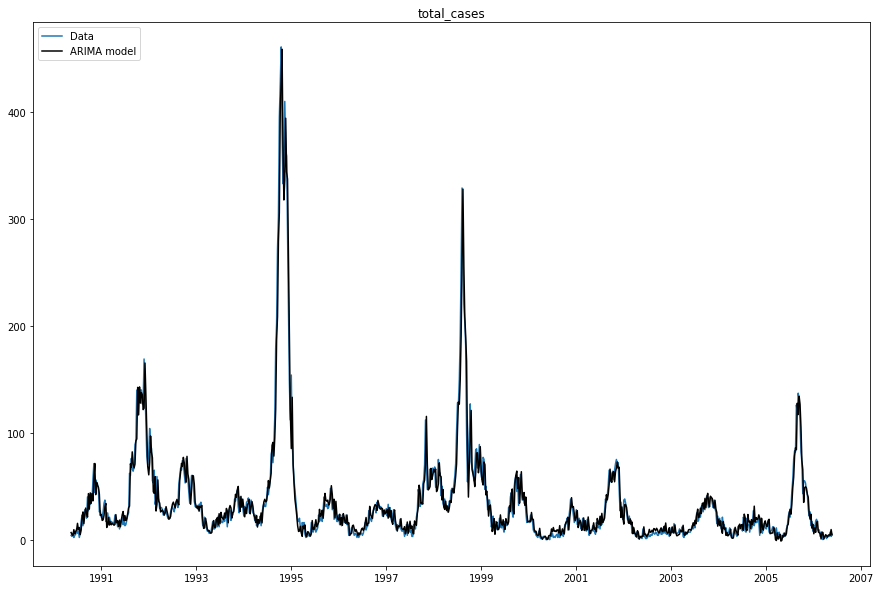

In [3]:
model.plot_fit(figsize=(15,10))

In [4]:
predictions=model.predict(h=100, oos_data=data_predict.iloc[0:] )
predictions.to_csv('predicting_SanJuan.csv', sep=',', encoding='utf-8')

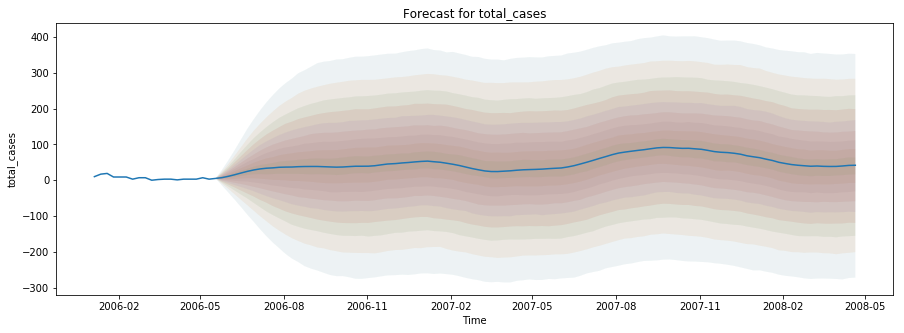

In [5]:
model.plot_predict(h=100, oos_data=data_predict.iloc[0:], figsize=(15,5))